In [12]:
# Auto-reload setup
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from scipy.signal import find_peaks

sys.path.append(os.path.abspath("../src"))
from plotting import plot_price_hour, plot_avg_hourly_prices, plot_smooth_prices

In [14]:
filepath = '../data/clean/exploitable/multiple_years.csv'

2025-01-02 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2025-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
           MTU (CET/CEST)  Day-ahead Price (EUR/MWh)       Date  Hour  \
0     2025-01-01 00:00:00                     118.46 2025-01-01     0   
1     2025-01-01 01:00:00                     129.07 2025-01-01     1   
2     2025-01-01 02:00:00                     121.10 2025-01-01     2   
3     2025-01-01 03:00:00                      94.28 2025-01-01     3   
4     2025-01-01 04:00:00                      63.69 2025-01-01     4   
...                   ...                        ...        ...   ...   
3498  2025-05-26 19:00:00                     149.17 2025-05-26    19   
3499  2025-05-26 20:00:00                     220.96 2025-05-26    20   
3500  2025-05-26 21:00:00                     167.46 2025-05-26    21   
3501  2025-05-26 22:00:00                     161.80 2025-05-26    22   
3502  2025-05-26 23:00:00                     118.28 20

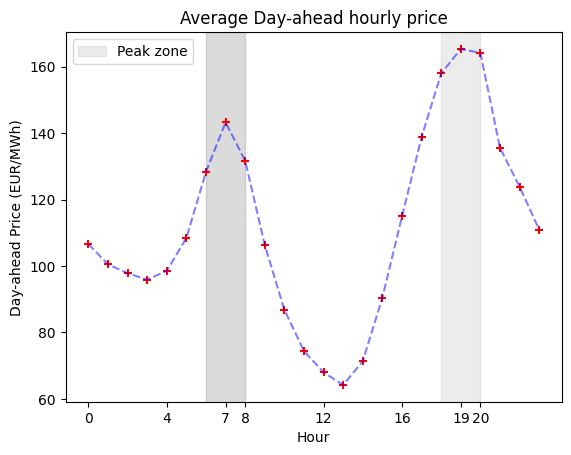

In [15]:
df = pd.read_csv('../data/clean_data.csv', parse_dates=['Date'])
period = ('2025-01-02', '2025-05-26')
plot_price_hour(df, period)

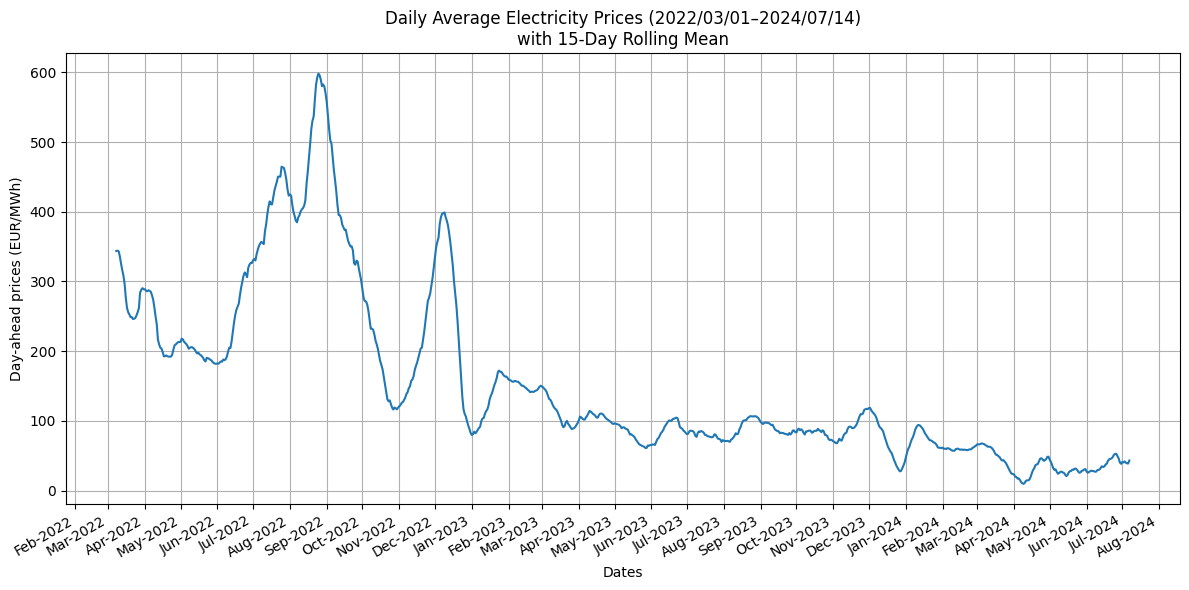

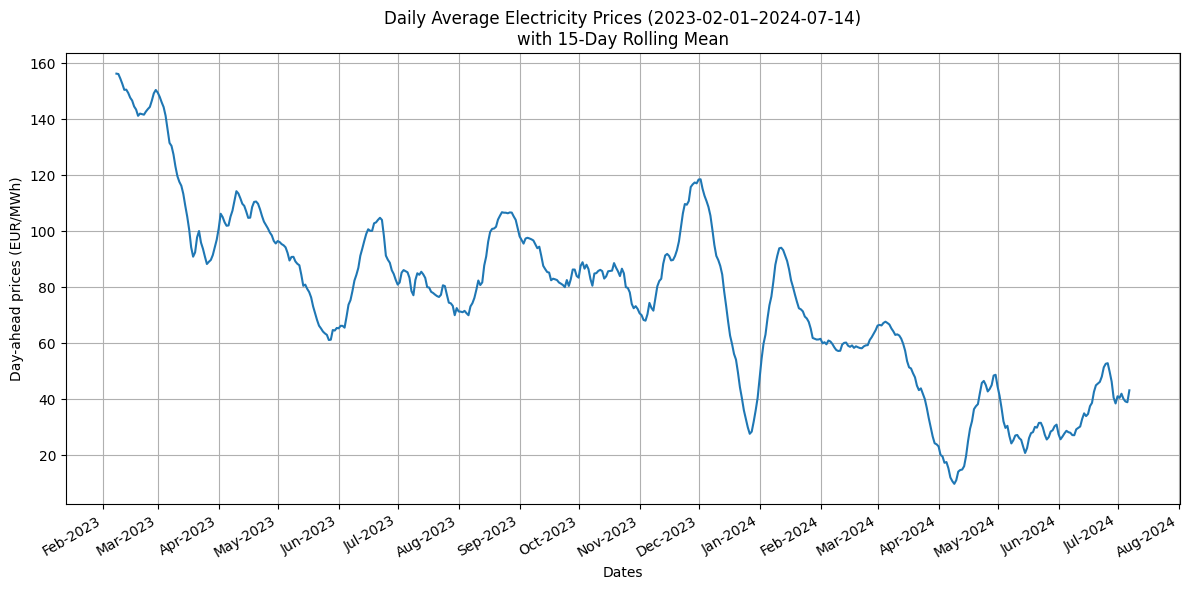

In [16]:
df = pd.read_csv(filepath, parse_dates=['MTU (CET/CEST)', 'Date'])
plot_smooth_prices(df, '2022/03/01', '2024/07/14', 15)
plot_smooth_prices(df, '2023-02-01', '2024-07-14', 15)

2021 OK
2022 OK
2023 OK
2024 OK


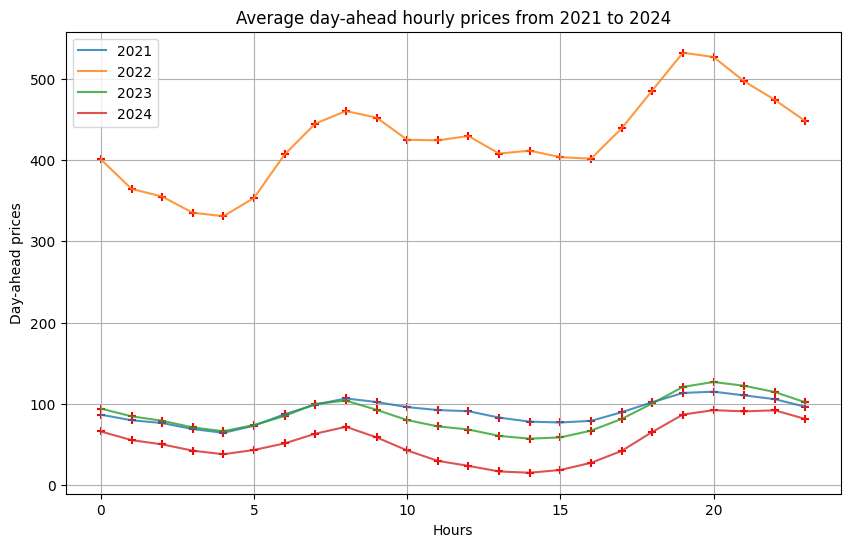

In [17]:
# period = 'autumn'
period = ('01-02', '05-26')
period = 'summer'

df = pd.read_csv(filepath, parse_dates=['Date'])
plot_avg_hourly_prices(df, 2021, 2024, period)

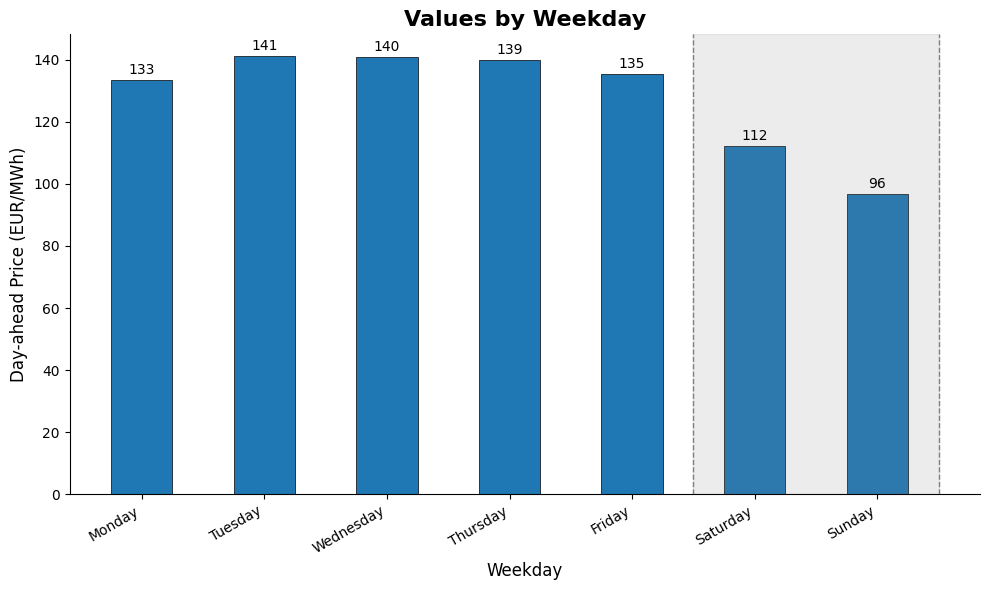

In [18]:
df_weekday = df.groupby('Weekday')['Day-ahead Price (EUR/MWh)'].mean().reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday['Weekday'] = pd.Categorical(df_weekday['Weekday'], categories=weekday_order, ordered=True)
df_weekday = df_weekday.sort_values('Weekday')

# plt.bar(df_weekday['Weekday'], df_weekday['Day-ahead Price (EUR/MWh)'])

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Choose a clean, soft color
bar_color = '#1f77b4'  # Blue from Matplotlib default palette
edge_color = 'black'

# Plot bars
bars = ax.bar(df_weekday['Weekday'], df_weekday['Day-ahead Price (EUR/MWh)'], width=0.5, color=bar_color, edgecolor=edge_color, linewidth=0.5)

# Add dotted vertical lines before Saturday and after Sunday
ax.axvline(x=4.5, color='gray', linestyle='--', linewidth=1)  # Between Friday and Saturday
ax.axvline(x=6.5, color='gray', linestyle='--', linewidth=1)  # After Sunday
ax.axvspan(4.5, 6.5, color='gray', alpha=0.15)

# Add data labels above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, int(height),
            ha='center', va='bottom', fontsize=10)

# Titles and labels
ax.set_title('Values by Weekday', fontsize=16, fontweight='bold')
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Day-ahead Price (EUR/MWh)', fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Make layout tighter
plt.tight_layout()

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)